# Import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as ply_go
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Load dataset

In [5]:
iris_data = datasets.load_iris()
x = iris_data.data
y = iris_data.target
iris = pd.DataFrame([np.append(i,j) for i,j in zip(x,y)])
feature = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris.columns = feature+ ['Label']
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Analysis and visualization

In [3]:
# 统计每个品种有多少个样本
iris["Label"].value_counts()

2.0    50
1.0    50
0.0    50
Name: Label, dtype: int64

In [16]:
my_title_layout = dict({"text":"my distribution", 'xanchor':'center', 'x':0.5, 'y':0.9, 'font':{'size':24}})
my_xaxis_layout = dict(title=dict(text="my x axis", font={'size':16}))
my_layout = dict(title=my_title_layout,
                xaxis= my_xaxis_layout)

DF = iris
for c in iris.columns[:-1]:
    hist_data = ply_go.Histogram(x=DF[c], name='Label', showlegend=False, xbins={'size':1})
    fig = ply_go.Figure(data=[hist_data], layout=my_layout)
    fig.update_layout(title={'text': c+' distribution'}, xaxis={"title":{"text":c}})
    fig.show()

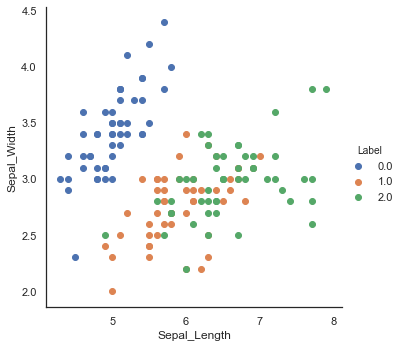

In [4]:
# seaborn在同一图中显示了双变量散点图
sns.set(style="white", color_codes=True)
sns.FacetGrid(iris, hue="Label", size=5) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
   .add_legend()

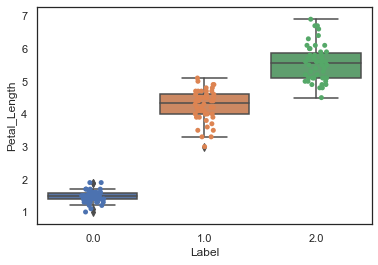

In [5]:
ax = sns.boxplot(x="Label", y="Petal_Length", data=iris)
ax = sns.stripplot(x="Label", y="Petal_Length", data=iris, jitter=True, edgecolor="gray")

# Split the data

In [6]:
train_data, test_data, train_label, test_label = train_test_split(x, y, random_state=1, train_size=0.8)

# Random Forest model trainning

In [7]:
rf = RandomForestClassifier(random_state=0, n_estimators=100)
scores = cross_val_score(rf, x, y.ravel(), cv=10, scoring="accuracy") 
print("RF准确率（交叉验证）:", scores.mean())

RF准确率（交叉验证）: 0.96


# Adjust parameters

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 100], 'max_features': [2, 3, 4], 'max_depth': [4, 6, 8]}]
 
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
 
grid_search.fit(x,y)
print('参数：',grid_search.best_params_)
print('准确率：',grid_search.best_score_)

参数： {'max_depth': 4, 'max_features': 2, 'n_estimators': 3}
准确率： 0.9666666666666666


# Feature Selection

In [9]:
rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf.fit(x,y.ravel())
feature_importance_values_rf = rf.feature_importances_
feature_importances_rf = pd.DataFrame({'importance': feature_importance_values_rf})
feature_importances_rf = pd.concat([pd.DataFrame({'Feature':feature}),feature_importances_rf],axis=1)
feature_importances_rf = feature_importances_rf.sort_values(['importance'], ascending=False)
feature_importances_rf

,Feature,importance
2,Petal_Length,0.460445
3,Petal_Width,0.424116
0,Sepal_Length,0.090908
1,Sepal_Width,0.024531


In [10]:
rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf.fit(train_data[:,2:], train_label) 
print("训练集：",rf.score(train_data[:,2:],train_label))
print("测试集：",rf.score(test_data[:,2:],test_label))

训练集： 0.9916666666666667
测试集： 0.9666666666666667
